In [1]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns

plt.style.use('seaborn-whitegrid')
sns.set_context('paper')

In [2]:
VARIABLES = [
            'Young', 'Old', 'Male', 'Female', 'Poor', 'Rich', 'Left', 'Right', 
        ]
N = len(VARIABLES)

YEARS = range(2016, 2021)

PAIRS = [
     ('Young', 'Old'),
     ('Male', 'Female'),
     ('Poor', 'Rich'),
     ('Left', 'Right'),
]

In [3]:
df = pd.read_csv("../data/results/sd-topics-model-regression-results.csv")

In [4]:
df['sign'] = df[['param','signif']].apply(lambda x: np.sign(x[0]) if x[1] else 0, axis=1)

In [5]:
def get_num_signif_years(signs):
    mode_value, mode_count = scipy.stats.mode(signs)
    return mode_count[0] if mode_value != 0 else 0

df_signif_all_years = (df
    .groupby(['class_child', 'class_parent']).sign.agg(get_num_signif_years)
    .reset_index()
    .rename(columns={'sign': 'num_signif_years'})
)
df = pd.merge(df, df_signif_all_years)

In [6]:
field2table = {field: (
        df[df.year == 2016]
            .pivot(index='class_child', columns='class_parent', values=field)
            .loc[VARIABLES].reindex(columns=VARIABLES)
    ) for field in ('param', 'num_signif_years', 'signif')}
field2table['param']

class_parent,Young,Old,Male,Female,Poor,Rich,Left,Right
class_child,,,,,,,,
Young,0.084328,-0.104345,0.032417,0.015977,0.011073,0.022133,-0.003971,0.012344
Old,-0.102813,0.120371,-0.038233,-0.019730,0.011292,-0.034976,-0.001235,-0.026848
Male,0.014564,-0.051167,0.059997,-0.003349,-0.006081,0.011688,-0.005550,0.000943
Female,-0.018725,0.008710,-0.023986,0.026280,-0.010159,0.014237,-0.002791,-0.017712
Poor,0.010850,-0.003234,0.000547,0.005969,0.049300,-0.032864,-0.000537,-0.002195
Rich,0.023980,0.006583,-0.003442,0.004089,-0.030150,0.017619,-0.001507,-0.019886
Left,0.020994,-0.025315,0.002941,-0.025145,0.009080,0.006647,-0.039594,0.101567
Right,0.005584,-0.015275,-0.019940,0.000971,0.002165,-0.001888,0.062644,-0.026069


/var/folders/4m/1n2z0ggs7rv5wk949nx3kgmw0000gp/T/ipykernel_24695/4150961733.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


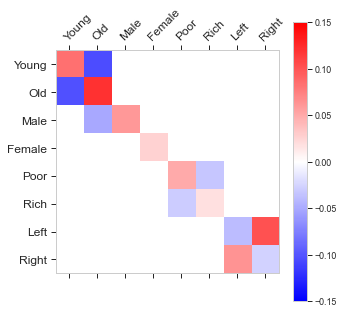

In [7]:
matrix = field2table['param'].values.copy()
matrix[field2table['num_signif_years'].values < 4] = np.nan
plt.figure(figsize=(5, 5))
plt.matshow(matrix, cmap='bwr', vmin=-0.15, vmax=0.15, fignum=1)
plt.xticks(np.arange(N), VARIABLES, rotation = 45,
           ha="left", va='bottom', rotation_mode="anchor", fontsize=12)
plt.yticks(np.arange(N), VARIABLES, fontsize=12)
plt.grid()
plt.colorbar()
plt.savefig('../paper/fig/matrix.pdf', bbox_inches='tight')